In [1]:
#Using the same data set of Civil_Engineering_Regression_Dataset.csv
#Part 4: Multiple Linear Regression
    #12. Compare the R-squared values of simple and multiple linear regression. Which model performs better?
    #13. What does the Adjusted R-squared value indicate about the multiple regression model?
    #14. How does multicollinearity affect the model? Check Variance Inflation Factor (VIF) to detect multicollinearity.

Column Names:
 Index(['Project_ID', 'Building_Height', 'Material_Quality_Index', 'Labor_Cost',
       'Concrete_Strength', 'Foundation_Depth', 'Weather_Index',
       'Construction_Cost'],
      dtype='object')
Missing Values:
 Project_ID                0
Building_Height           0
Material_Quality_Index    0
Labor_Cost                0
Concrete_Strength         0
Foundation_Depth          0
Weather_Index             0
Construction_Cost         0
dtype: int64
Summary Statistics:
        Project_ID  Building_Height  Material_Quality_Index  Labor_Cost  \
count  100.000000       100.000000              100.000000  100.000000   
mean    50.500000        26.158133                5.940000  188.582366   
std     29.011492        13.387023                2.048996   69.448489   
min      1.000000         5.248495                3.000000   54.518841   
25%     25.750000        13.694034                4.000000  130.371094   
50%     50.500000        25.886410                6.000000  182.399916

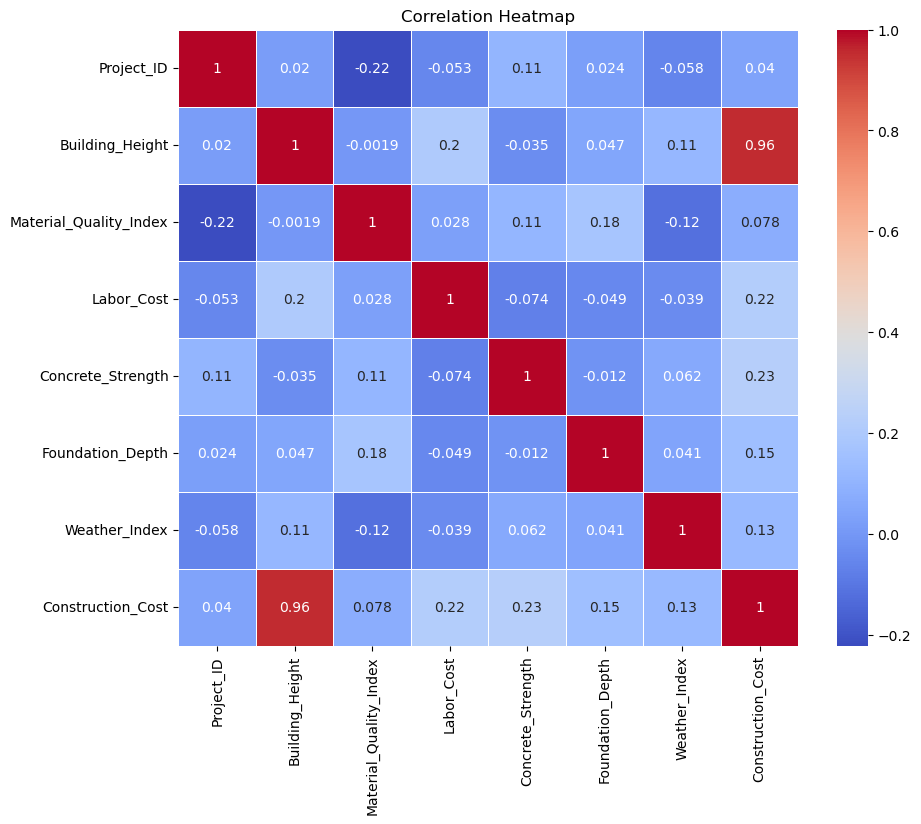

Simple Linear Regression R-squared: 0.92
                            OLS Regression Results                            
Dep. Variable:      Construction_Cost   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.153e+04
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          1.23e-171
Time:                        12:46:41   Log-Likelihood:                -372.31
No. Observations:                 100   AIC:                             756.6
Df Residuals:                      94   BIC:                             772.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

file_path = r'C:\ML\Civil_Engineering_Regression_Dataset.csv'
df = pd.read_csv(file_path)
print("Column Names:\n", df.columns)

# Check for Missing Values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)
df.fillna(df.mean(), inplace=True)

# Generate Summary Statistics
summary_statistics = df.describe()
print("Summary Statistics:\n", summary_statistics)

# Create a Correlation Heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

X_simple = df['Building_Height']
y = df['Construction_Cost']

# Add a constant to the independent variable for the intercept
X_simple = sm.add_constant(X_simple)

# Fit the simple linear regression model
model_simple = sm.OLS(y, X_simple).fit()

# Get the R-squared value
r_squared_simple = model_simple.rsquared
print(f"Simple Linear Regression R-squared: {r_squared_simple:.2f}")

X_multiple = df[['Building_Height', 'Material_Quality_Index', 'Labor_Cost', 'Concrete_Strength', 'Foundation_Depth']]
y = df['Construction_Cost']

# Add a constant to the independent variables for the intercept
X_multiple = sm.add_constant(X_multiple)

# Fit the multiple linear regression model
model_multiple = sm.OLS(y, X_multiple).fit()

# Get the summary of the model
summary = model_multiple.summary()
print(summary)

# Get the R-squared value
r_squared_multiple = model_multiple.rsquared
print(f"Multiple Linear Regression R-squared: {r_squared_multiple:.2f}")

# Get the Adjusted R-squared value
adjusted_r_squared = model_multiple.rsquared_adj
print(f"Adjusted R-squared: {adjusted_r_squared:.2f}")

# Get the coefficients
coefficients = model_multiple.params
print(f"Coefficients:\n{coefficients}")

# Equation of the multiple regression model
equation = f"Construction_Cost = {coefficients[0]:.2f} + ({coefficients[1]:.2f} * Building_Height) + ({coefficients[2]:.2f} * Material_Quality_Index) + ({coefficients[3]:.2f} * Labor_Cost) + ({coefficients[4]:.2f} * Concrete_Strength) + ({coefficients[5]:.2f} * Foundation_Depth)"
print(equation)

# Identify the variable with the highest impact based on the regression coefficients
max_impact_var = coefficients.idxmax()
print(f"Independent Variable with Highest Impact: {max_impact_var}")

vif_data = pd.DataFrame()
vif_data['Variable'] = X_multiple.columns
vif_data['VIF'] = [variance_inflation_factor(X_multiple.values, i) for i in range(X_multiple.shape[1])]
print(vif_data)
